<a href="https://colab.research.google.com/github/LohanRosa/Transtorno_depressivo_EUA/blob/main/projeto_estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O desafio proposto trata sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

 Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

# Seu desafio é responder às seguintes perguntas:

*   Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?
*   Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta amostra de população?


In [ ]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", None) # esse codigo faz com que a tabela fique inteira para visualização.

Demo_phq

In [ ]:
df_demo_phq = pd.read_csv("DEMO_PHQ.csv")
df_demo_phq

FileNotFoundError: ignored

In [ ]:
df_demo_phq.shape

(5334, 15)

In [ ]:
df_demo_phq.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


PAG_HEI

In [ ]:
df_pag_hei = pd.read_csv("PAG_HEI.csv")
df_pag_hei

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


In [ ]:
df_pag_hei.shape

(9424, 17)

In [ ]:
df_pag_hei.describe()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,9424.000000,7150.000000,7150.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,36311.463285,565.120067,2.074685,2.862097,1.547884,2.659902,2.405864,1.674949,4.054757,4.211867,2.325303,4.205320,4.988956,5.540906,5.781459,5.959600,48.218865
std,2991.517794,908.839544,0.917351,1.472391,2.046650,1.930251,2.152560,1.823515,1.478922,1.157194,2.132526,3.147736,3.293786,3.452289,3.090926,3.215960,11.884725
min,31128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.243513
25%,33720.750000,55.427252,1.000000,1.692308,0.000000,0.725494,0.000000,0.000000,3.336989,3.587339,0.000000,1.544438,2.258630,2.652670,3.514716,3.599885,39.643349
50%,36307.500000,256.351039,2.000000,2.753825,0.000000,2.618554,2.179715,1.018207,5.000000,5.000000,1.836220,3.789177,5.144181,5.880968,5.979335,6.327416,47.589498
75%,38902.250000,696.016166,3.000000,4.165605,3.498013,5.000000,5.000000,2.997076,5.000000,5.000000,5.000000,6.464805,7.705660,8.756728,8.390884,8.859520,56.028859
max,41474.000000,13801.385681,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383


## tratando os dados

combinando tabela

In [ ]:
df = df_demo_phq.merge(
    df_pag_hei,
    on=["SEQN"],
    how="left",
)
df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [ ]:
df.shape

(5334, 31)

In [ ]:
len(df)

5334

#tratamento de valores nulos

In [ ]:
# Calculando o total de valores nulos e o percentual de valores nulos em cada coluna
null_counts = df.isnull().sum()
null_percentages = null_counts / len(df) * 100

# Criando um novo dataframe com os resultados
result_df = pd.DataFrame({'Total de valores nulos': null_counts,
                          'Percentual de valores nulos': null_percentages})
result_df

,Total de valores nulos,Percentual de valores nulos
SEQN,0,0.000000
DPQ010,498,9.336333
DPQ020,498,9.336333
DPQ030,498,9.336333
DPQ040,498,9.336333
DPQ050,498,9.336333
DPQ060,498,9.336333
DPQ070,498,9.336333
DPQ080,498,9.336333
DPQ090,498,9.336333


In [ ]:
# Preenchimento de valores nulos
df["HEI2015C7_TOTPROT"].fillna(0)

0       0.000000
1       4.071959
2       5.000000
3       5.000000
4       4.088849
          ...   
5329    5.000000
5330    3.759596
5331    5.000000
5332    5.000000
5333    5.000000
Name: HEI2015C7_TOTPROT, Length: 5334, dtype: float64

# Análise exploratória

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlações

In [ ]:
df_corr = df.corr()
df_corr

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,1.000000,-0.000706,-0.018913,0.020577,-0.016712,-0.004339,-0.011532,0.011161,-0.001257,0.002369,-0.017662,0.007980,0.009934,0.006723,0.015027,0.011460,0.006259,-0.015359,-0.009287,-0.053060,-0.050146,-0.009268,0.009029,0.004559,-0.009196,-0.009809,0.001763,-0.006266,-0.017712,-0.012070,-0.033891
DPQ010,-0.000706,1.000000,0.451918,0.327053,0.358446,0.319061,0.340175,0.322822,0.293895,0.254674,0.032341,0.017728,0.013951,-0.105699,-0.011849,-0.035462,-0.079739,-0.022777,-0.029731,-0.026997,-0.018673,-0.017323,-0.039792,-0.027628,-0.027907,-0.003751,0.035676,0.022437,-0.010659,-0.051205,-0.031738
DPQ020,-0.018913,0.451918,1.000000,0.357029,0.383790,0.358143,0.481924,0.416257,0.287950,0.315050,0.056934,-0.004926,-0.010166,-0.101710,-0.026109,-0.042307,-0.072747,-0.041348,-0.022629,-0.044876,-0.045667,-0.052262,-0.019322,-0.024278,-0.029129,-0.000965,0.023221,0.012342,-0.003805,-0.050106,-0.046490
DPQ030,0.020577,0.327053,0.357029,1.000000,0.486813,0.329398,0.307786,0.312701,0.249745,0.218110,0.073799,0.009647,0.009266,-0.038433,-0.025261,-0.033156,-0.068694,-0.029698,-0.033717,-0.010234,-0.015652,-0.023753,-0.000445,-0.040232,-0.013480,-0.025515,0.032526,0.024346,-0.014401,-0.037433,-0.027754
DPQ040,-0.016712,0.358446,0.383790,0.486813,1.000000,0.382440,0.310209,0.334265,0.289128,0.220650,0.138648,0.000150,0.046536,-0.018923,-0.011217,-0.082790,-0.116660,-0.038232,-0.022953,-0.021872,-0.024335,-0.012012,0.013993,-0.058668,-0.036915,-0.030118,-0.015723,0.003583,-0.059130,-0.027618,-0.061494
DPQ050,-0.004339,0.319061,0.358143,0.329398,0.382440,1.000000,0.309504,0.331702,0.262454,0.174588,0.096692,-0.050269,-0.012178,-0.043882,-0.024469,-0.039456,-0.073219,-0.053707,-0.012251,-0.055275,-0.042016,-0.054470,-0.021680,-0.049850,-0.013458,-0.007182,0.045857,0.000173,-0.000538,-0.076540,-0.052244
DPQ060,-0.011532,0.340175,0.481924,0.307786,0.310209,0.309504,1.000000,0.356027,0.277614,0.303875,0.053173,-0.003172,-0.003720,-0.050332,-0.009212,-0.037729,-0.052063,-0.030928,-0.006646,-0.029072,-0.014319,-0.023033,-0.020186,-0.020093,-0.018726,-0.017465,0.013729,0.010977,0.004151,-0.049225,-0.032938
DPQ070,0.011161,0.322822,0.416257,0.312701,0.334265,0.331702,0.356027,1.000000,0.324072,0.339501,0.041414,-0.017589,0.003264,-0.044922,-0.010482,-0.033187,-0.044193,-0.018618,-0.015066,-0.042472,-0.041804,-0.031525,0.006394,-0.041332,-0.020887,-0.027657,0.027162,0.024905,-0.011840,-0.070249,-0.044718
DPQ080,-0.001257,0.293895,0.287950,0.249745,0.289128,0.262454,0.277614,0.324072,1.000000,0.359042,0.010962,0.013000,-0.024904,-0.108498,0.007052,-0.029560,-0.040537,-0.019654,-0.008383,-0.008467,-0.023427,-0.009687,-0.055244,-0.017927,-0.019402,0.027511,0.008398,-0.011654,0.033121,-0.038838,-0.018453
DPQ090,0.002369,0.254674,0.315050,0.218110,0.220650,0.174588,0.303875,0.339501,0.359042,1.000000,0.016620,-0.007500,-0.018212,-0.075506,-0.004027,-0.011155,-0.037258,-0.028192,0.001672,-0.006982,-0.024313,-0.031703,-0.043061,-0.006979,-0.019563,0.013606,0.038203,-0.001849,0.027058,-0.049031,-0.015573


In [ ]:
corr_values = df_corr.unstack()
corr_values = corr_values.sort_values(ascending=False)
corr_values = corr_values.loc[corr_values != 1]
corr_values

HEI2015C3_TOTALFRUIT  HEI2015C4_WHOLEFRUIT    0.750665
HEI2015C4_WHOLEFRUIT  HEI2015C3_TOTALFRUIT    0.750665
HEI2015C12_SFAT       HEI2015C9_FATTYACID     0.591953
HEI2015C9_FATTYACID   HEI2015C12_SFAT         0.591953
ADHERENCE             PAG_MINW                0.574749
                                                ...   
HEI2015C13_ADDSUG     HEI2015C10_SODIUM      -0.293527
HEI2015C6_TOTALDAIRY  HEI2015C12_SFAT        -0.335150
HEI2015C12_SFAT       HEI2015C6_TOTALDAIRY   -0.335150
HEI2015C6_TOTALDAIRY  HEI2015C9_FATTYACID    -0.449591
HEI2015C9_FATTYACID   HEI2015C6_TOTALDAIRY   -0.449591
Length: 930, dtype: float64

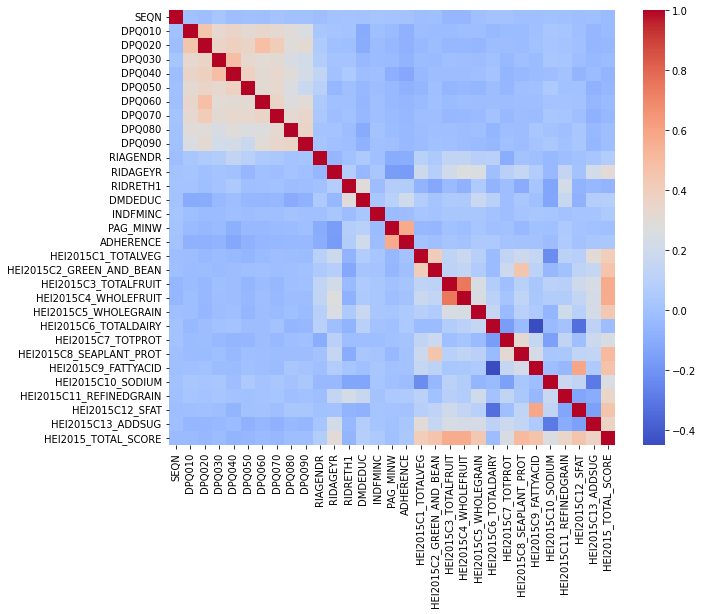

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
corr_map = sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)

In [ ]:
df_corr = df.corr()
corr_values = df_corr['HEI2015_TOTAL_SCORE'].sort_values(ascending=False)
print(corr_values)

HEI2015_TOTAL_SCORE         1.000000
HEI2015C3_TOTALFRUIT        0.568975
HEI2015C4_WHOLEFRUIT        0.567289
HEI2015C8_SEAPLANT_PROT     0.503079
HEI2015C9_FATTYACID         0.466688
HEI2015C2_GREEN_AND_BEAN    0.458022
HEI2015C12_SFAT             0.454700
HEI2015C5_WHOLEGRAIN        0.437320
HEI2015C1_TOTALVEG          0.406687
HEI2015C13_ADDSUG           0.366818
HEI2015C11_REFINEDGRAIN     0.349906
RIDAGEYR                    0.299772
HEI2015C10_SODIUM           0.252643
HEI2015C7_TOTPROT           0.242949
DMDEDUC                     0.084033
RIAGENDR                    0.073158
INDFMINC                    0.050832
ADHERENCE                   0.040116
PAG_MINW                   -0.005488
DPQ090                     -0.015573
DPQ080                     -0.018453
HEI2015C6_TOTALDAIRY       -0.022858
DPQ030                     -0.027754
DPQ010                     -0.031738
DPQ060                     -0.032938
SEQN                       -0.033891
DPQ070                     -0.044718
D

#Análise e Engenharia de variaveis

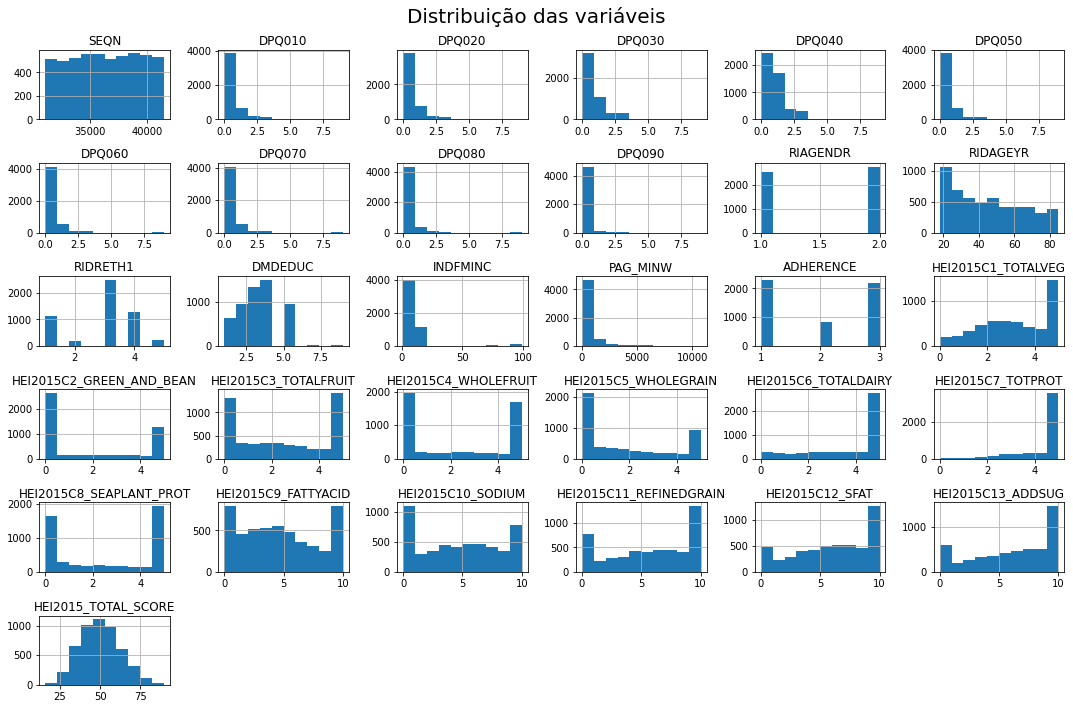

In [ ]:
# Plotar histogramas de todas as colunas numéricas
df.hist(bins=10, figsize=(15, 10))

# Ajustar os títulos e os labels dos eixos
plt.suptitle('Distribuição das variáveis', fontsize=20)
plt.tight_layout()
plt.show()

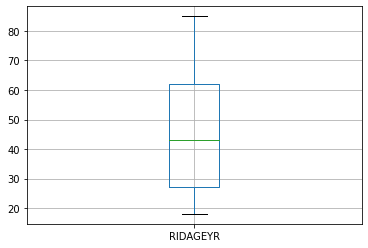

In [ ]:
#idade

box_plot = df[["RIDAGEYR"]].boxplot()

In [ ]:
df["RIDAGEYR"].median()

43.0

In [ ]:
colunas = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']

In [ ]:
colunas

['DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090']

In [ ]:
for coluna in colunas:
    print(coluna)

DPQ010
DPQ020
DPQ030
DPQ040
DPQ050
DPQ060
DPQ070
DPQ080
DPQ090


In [ ]:
df["DPQ010"] = df["DPQ010"].replace([7, 9], None)

In [ ]:
colunas = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
for coluna in colunas:
    # Substituindo os valores 7 e 9 na coluna1 por nulo
    df[coluna] = df[coluna].replace([7, 9], None)
df['resposta_media'] = df[colunas].mean(axis=1)
df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,resposta_media
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.000000
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.000000
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.000000
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,0.222222
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,1.111111
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,0.222222
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.000000


#Gênero

In [ ]:
df["RIAGENDR"] = df["RIAGENDR"].replace({1: "Masculino", 2: "Feminino"})
df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,resposta_media
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feminino,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.000000
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.000000
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.000000
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,Feminino,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Feminino,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,0.222222
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,Feminino,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,1.111111
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Masculino,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,0.222222
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,34,3,4,7.0,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.000000


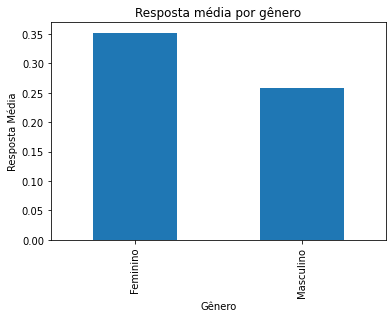

In [ ]:
# Selecionar as duas variáveis que deseja plotar
media_genero = df.groupby('RIAGENDR')['resposta_media'].mean()

media_genero.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Resposta Média')
plt.title('Resposta média por gênero')
plt.show()

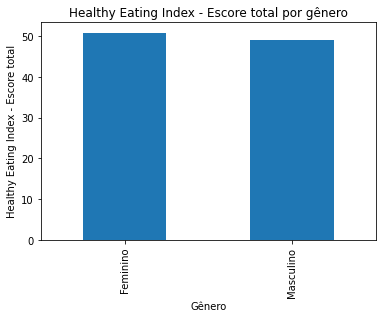

In [ ]:
# Selecionar as duas variáveis que deseja plotar
media_genero = df.groupby('RIAGENDR')['HEI2015_TOTAL_SCORE'].mean()

media_genero.plot(kind='bar')
plt.xlabel('Gênero')
plt.ylabel('Healthy Eating Index - Escore total')
plt.title('Healthy Eating Index - Escore total por gênero')
plt.show()

score total

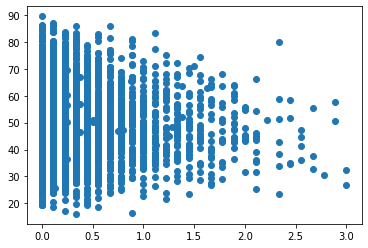

In [ ]:
# Selecionar as duas variáveis que deseja plotar
x = df['resposta_media']
y = df['HEI2015_TOTAL_SCORE']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.show()

exercícios físicos

In [ ]:
media_adherence

ADHERENCE
Acima       50.537742
Adequado    49.854078
Baixo       49.460398
Name: HEI2015_TOTAL_SCORE, dtype: float64

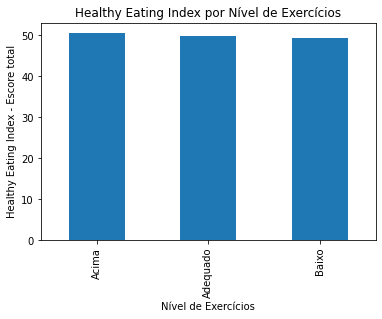

In [ ]:
# Selecionar as duas variáveis que deseja plotar
df["ADHERENCE"] = df["ADHERENCE"].replace({1: "Baixo", 2: "Adequado", 3:"Acima"})
media_adherence = df.groupby('ADHERENCE')['HEI2015_TOTAL_SCORE'].mean()

media_adherence.plot(kind='bar')
plt.xlabel('Nível de Exercícios')
plt.ylabel('Healthy Eating Index - Escore total')
plt.title('Healthy Eating Index por Nível de Exercícios')
plt.show()

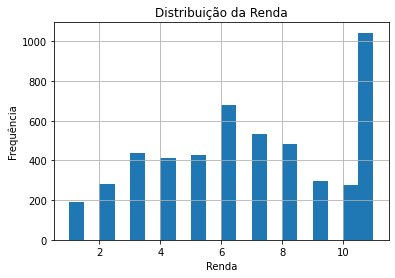

In [ ]:
#renda

df_plot = df[df['INDFMINC'] < 12]
df_plot['INDFMINC'].hist(bins=20)

# adicionar rótulos e título ao gráfico
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.title('Distribuição da Renda')
plt.show()

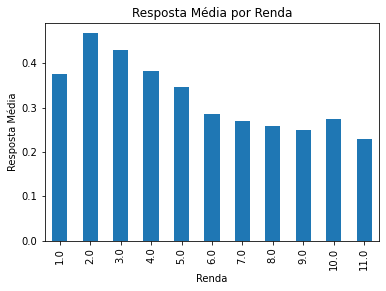

In [ ]:
# Selecionar as duas variáveis que deseja plotar
media_genero = df.groupby('INDFMINC')['resposta_media'].mean()
indices_a_remover = [12, 13, 77, 99]
media_genero = media_genero.drop(indices_a_remover)

media_genero.plot(kind='bar')
plt.xlabel('Renda')
plt.ylabel('Resposta Média')
plt.title('Resposta Média por Renda')
plt.show()

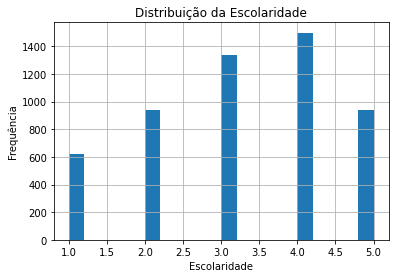

In [ ]:
#escolaridade

df_plot = df[df['DMDEDUC'] < 7]
df_plot['DMDEDUC'].hist(bins=20)

# adicionar rótulos e título ao gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.title('Distribuição da Escolaridade')
plt.show()

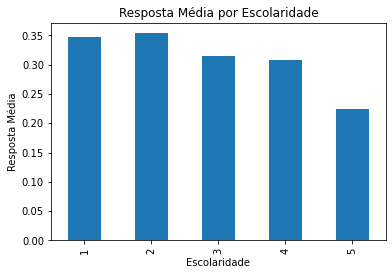

In [ ]:
# Selecionar as duas variáveis que deseja plotar
media_genero = df.groupby('DMDEDUC')['resposta_media'].mean()
indices_a_remover = [7, 9]
media_genero = media_genero.drop(indices_a_remover)

media_genero.plot(kind='bar')
plt.xlabel('Escolaridade')
plt.ylabel('Resposta Média')
plt.title('Resposta Média por Escolaridade')
plt.show()